Binarno stablo traženja
============

**Binarno stablo** T je konačan skup podataka istog tipa koje zovemo **čvorovi**. Pri tome vrijedi:
- T je prazan skup (prazno stablo), ili
- postoji istaknuti čvor r koji se zove **korijen** od T, a ostali čvori grade uređeni par (T<sub>L</sub>,T<sub>R</sub>) disjunktnih (manjih) binarnih stabala.

Definicija je očito reurzivna. T<sub>L</sub> i T<sub>R</sub> su **podstabla** korijena te ujedno lijevo, odnosno, desno **dijete** korijena. Korijen je njihov **roditelj**. Djeca istog čvora zovu se **braća**. Čvor bez djece naziva se **list**.

In [2]:
from IPython.display import Image
Image(url='https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg')

Binarno stablo T je **binarno stablo traženja** ako su ispunjeni sljedeći uvjeti:
- čvorvi od T su označeni podacima nekog tipa na kojem je definiran totalni uređaj ≤.
- neka je i bilo koji čvor od T. Tada su oznake svih čvorova u lijevom podstablu od i manje od oznake od i. Također, oznake svih čvorova u desnom podstablu od i su veće ili jednake od oznake od i.

### Načini obilaska stabla

In [3]:
from IPython.display import Image
Image(url='https://cdn-images-1.medium.com/max/300/1*KXQXUL-lLX140J959HCoxA.png')

Na slici vidimo primjer binarnog stabla traženja. Postoje tri načina obilaska stabla koja se također implementiraju rekurzivno.
##### Preorder
1. Posjeti se korijen.
2. Obiđe se lijevo podstablo preorder obilaskom.
3. Obiđe se desno podstablo preorder obilaskom.

Redoslijed sa slike:  8-3-1-6-4-7-10-14-13

##### Inorder
1. Obiđe se lijevo podstablo inorder obilaskom.
2. Posjeti se korijen.
3. Obiđe se desno podstablo inorder obilaskom.

Redoslijed sa slike: 1-3-4-6-7-8-10-13-14.
Primjetimo da ovaj način obilaska daje uzlazno sortirani niz.

##### Postorder: 
1. Obiđe se lijevo podstablo postorder obilaskom.
2. Obiđe se desno podstablo postorder obilaskom.
3. Posjeti se korijen.

Redoslijed sa slike: 1-4-7-6-3-13-14-10-8

### Implementacija Binarnog stabla traženja

Implementirat ćemo samo funkcije koje će nam biti potrebne u nastavku, a to su:

- funkcija **insert** za ubacivanje elemenata u stablo kreće od korijena. Prvo provjerava da li je novi podatak manji od korijena, pa u slučaju da je manji gleda se lijevo dijete te se ponovno uspoređuje s tim čvorom, u slučaju da je veći od korijena novi čvor koji se gleda je desno dijete i tako skroz dok ne nađemo na slobodni čvor. Kada je novi podatak jednak kao i čvor tada se ništa ne događa kako ne bi imali duple elemente. 
- funkcija **find** radi gotovo istu stvar. Uspoređuje na isti način skroz dok ne pronađe element ili ne dođe do kraja stabla.
- funkcije za obilazak stabla su gotovo identične. Sve rade rekurzivno, a razlika je u tome što **preorder** prvo ispisuje ime čvora(krenuvši od korijena), zatim ulazi u lijevo pa desno dijete. Funkcija **inorder** prvo ulazi u lijevo dijete pa ispisuje čvor te na kraju ulazi u desno dijete te na kraju funkcija **postorder** prvo ulazi u lijevo dijete, zatim desno i na kraju ispisuje čvor.

Nakon implementacije ubacivat ćemo elemente u stablo da bi dobili isto ono kao na prethodnoj slici.
S obzirom da smo objasnili kako radi funkcija insert elemente bi trebali ubaciti sljedećim redom: 8-3-10-14-13-1-6-4-7. Na kraju ćemo obići stablo na sva tri načina da se uvjerimo kako zaista radi.

In [13]:
inorder_polje = []

class Node:
    def __init__(self, val):
        self.value = val
        self.leftChild = None
        self.rightChild = None
        
    def insert(self, data):
        if self.value == data:
            return False
        elif self.value > data:
            if self.leftChild:
                return self.leftChild.insert(data)
            else:
                self.leftChild = Node(data)
                return True;
        else:
            if self.rightChild:
                return self.rightChild.insert(data)
            else:
                self.rightChild = Node(data)
                return True
    
    def find(self, data):
        if (self.value == data):
            return True
        elif self.value > data:
            if self.leftChild:
                return self.leftChild.find(data)
            else:
                return False
        else:
            if self.rightChild:
                return self.rightChild.find(data)
            else:
                return False
    
    def preorder(self):
        if self:
            print(str(self.value))
            if self.leftChild:
                self.leftChild.preorder()
            if self.rightChild:
                self.rightChild.preorder()
    
    def postorder(self):
        if self:
            if self.leftChild:
                self.leftChild.postorder()
            if self.rightChild:
                self.rightChild.postorder()
            print(str(self.value))
    
    def inorder(self):
        if self:
            if self.leftChild:
                self.leftChild.inorder()
            print(str(self.value))
            if self.rightChild:
                self.rightChild.inorder()
            
    def inorder_to_array(self):
        if self:
            if self.leftChild:
                self.leftChild.inorder_to_array()
            inorder_polje.append(int(self.value))
            if self.rightChild:
                self.rightChild.inorder_to_array()
        
            
        
class Tree:
    def __init__(self):
        self.root = None
        
    def insert(self, data):
        if self.root:
            return self.root.insert(data)
        else:
            self.root = Node(data)
            return True
        
    def find(self, data):
        if self.root:
            return self.root.find(data)
        else:
            return False
    
    def preorder(self):
        self.root.preorder()
    
    def postorder(self):
        self.root.postorder()
        
    def inorder(self):
        self.root.inorder()
        
    def inorder_to_array(self):
        self.root.inorder_to_array()


stablo = Tree()
stablo.insert(8)
stablo.insert(3)
stablo.insert(10)
stablo.insert(14)
stablo.insert(13)
stablo.insert(1)
stablo.insert(6)
stablo.insert(4)
stablo.insert(7)

print("PreOrder:")
stablo.preorder()
print("InOrder:")
stablo.inorder()
print("PostOrder:")
stablo.postorder()

PreOrder:
8
3
1
6
4
7
10
14
13
InOrder:
1
3
4
6
7
8
10
13
14
PostOrder:
1
4
7
6
3
13
14
10
8


### Kreiranje i analiza podataka

Sada ćemo kreirati te analizirati podatke i napraviti .txt datoteku koju ćemo koristiti za ispitivanje brzine binarnog stabla traženja kojeg smo implementirali.

Podatci koje ćemo koristiti predstavljat će podatke jedne mobilne trgovine koju zanima koji se brendovi najviše prodaju. Dakle, ako kupac kupi nešto od marke "Samsung" u vrijednosti od 500$ trgovina bilježi par (Samsung, 500) itd. Kreirat ćemo 1000 takvih parova, odnosno računa.

In [43]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
smartphone = ['Apple', 'Samsung', 'LG', 'HTC', 'Sony', 'Nokia', 'Blackberry', 'Motorola', 'Huawei']

In [45]:
random.seed(500)
random_smartphone = [smartphone[random.randint(low=0, high = len(smartphone))] for i in range(1000)]

In [46]:
cijena = [random.randint(low=20,high=1500) for i in range(1000)]
racuniDataSet = list(zip(random_smartphone,cijena))

In [47]:
df = pd.DataFrame(data = racuniDataSet, columns=['Smartphone', 'Cijena'])
df[:10]

,Smartphone,Cijena
0,Motorola,163
1,Samsung,94
2,Samsung,41
3,Huawei,198
4,Motorola,642
5,Samsung,998
6,Samsung,749
7,Nokia,856
8,LG,1030
9,LG,880


In [48]:
df.to_csv('racuni_po_markama.txt',index=False,header=False)

In [49]:
Location = r'racuni_po_markama.txt'

In [69]:
df = pd.read_csv(Location, names=['Smartphone','Cijena'])
df.head()

,Smartphone,Cijena
0,Motorola,163
1,Samsung,94
2,Samsung,41
3,Huawei,198
4,Motorola,642


In [73]:
for x in df['Smartphone'].unique():
    print(x)

Motorola
Samsung
Huawei
Nokia
LG
HTC
Blackberry
Apple
Sony


In [74]:
name = df.groupby('Smartphone')
df = name.sum()
df

,Cijena
Smartphone,
Apple,90037
Blackberry,92181
HTC,85792
Huawei,88032
LG,80080
Motorola,58267
Nokia,79305
Samsung,101255
Sony,93589


In [76]:
Sorted = df.sort_values(['Cijena'], ascending=False)
Sorted.head(1)

,Cijena
Smartphone,
Samsung,101255


Najprodavaniji brend


,Cijena
Smartphone,
Samsung,101255
Sony,93589
Blackberry,92181
Apple,90037
Huawei,88032
HTC,85792
LG,80080
Nokia,79305
Motorola,58267


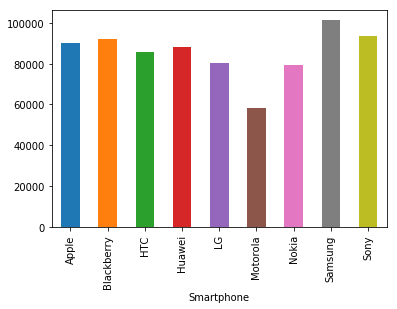

In [78]:
df['Cijena'].plot.bar()

print("Najprodavaniji brend")
df.sort_values(by='Cijena', ascending=False)

### Analiza brzine binarnog stabla traženja

S obzirom da funkcije za pronalaženje i ubacivanje elemenata prolaze putom od korijena do nekog čvora vrijeme izvršavanja tih funkcija je ograničeno visinom stabla. Visina stabla varira između **log<sub>2</sub>(n+1)-1** te **n-1**, ovisno o tome kako su raspoređeni elementi u stablu. U ekstremnom slučaju stablo može biti ispruženo pa ima brzinu izvršavanja O(n),a također stablo može biti potpuno pa imati brzinu O(log(n)) gdje je n broju elemenata. Mi ćemo vidjeti brzinu izvršavanja u prosječnom slučaju te također brzinu kada je stablo ispruženo tj. kada mu ubacujemo sortirani niz.

Za početak ćemo u jedno stablo(*stablo_avg*) ubaciti sve cijene redom iz .txt datoteke.
U drugo stablo (*stablo_max*) ćemo ubaciti sortirani niz koji ćemo dobiti preorder obilaskom prvog stabla. Za to ćemo koristiti posebnu funkciju koja će upisivati elemente u *inorder_polje* dok obilazi stablo.

Na kraju nam je cilj izračunati vrijeme potrebno da se pronađe najveći element kod oba stabla i usporediti brzine.

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('racuni_po_markama.txt', sep=",", header=None)

X1 = []

for i in range(len(X)):
    X1.append(X[1][i])

In [14]:
stablo_avg = Tree()
for j in range(len(X1)):
        stablo_avg.insert(X1[j])
        
stablo_avg.inorder_to_array()

In [18]:
stablo_max = Tree()
for k in range(len(inorder_polje)):
    stablo_max.insert(inorder_polje[k])

U stablima *stablo_avg* i *stablo_max* su pohranjeni isti elementi u drugom rasporedu. Sada ćemo pronaći najveći element koji smo ubacili u stablo iz polja *X1*, odnosno istog tog sortiranog polja *inorder_polje* i izračunati brzinu pronalaženja u oba stabla.

In [21]:
print(max(X1))
print(max(inorder_polje))

1499
1499


In [22]:
import time

start = time.time()
stablo_avg.find(1499)
end = time.time()
print(end - start)

start = time.time()
stablo_max.find(1499)
end = time.time()
print(end - start)


0.0001983642578125
0.0013599395751953125


### Zaključak

Binarno stablo traženja jako brzo pronalazi elemente. Ali kao što vidimo vremena se dosta razlikuju od najgoreg do prosječnog slučaja. U binarno stablo traženja u koje smo element ubacivali bez ikakvog reda vrijeme je iznosilo 0.19836ms, dok je za vrijeme u najgorem slučaju 1.35993ms što znači da je u prosječnom slučaju algoritam bio gotovo 7x brži. To znači da binarno stablo traženja trebamo koristiti ako imamo što veći "nered" među elementima, dok u slučajevima gdje je niz više sortiran - algoritam traženja će biti sporiji.